# **Exercise 2 (Ballistic Deposition)**

## Question 3.1 (Random Ballistic Deposition) (ول نشست)

### plotting and finding the Average height & Surface roughness

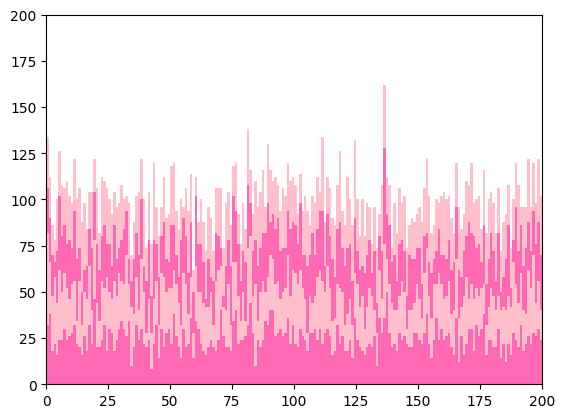

,Average Height,Surface Roughness
0,0.01,0.141067
1,0.02,0.198997
2,0.03,0.243105
3,0.04,0.280000
4,0.05,0.312250
...,...,...
9995,99.96,14.512009
9996,99.97,14.511344
9997,99.98,14.513428
9998,99.99,14.500341


In [24]:
#1 dimentional Random Ballistic Deposition :

# h_bar = متوسط ارتفاع لایه / w_t = ناهمواری سطح

import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches # a library needed for making a shape(square)

fig, ax=plt.subplots() #we use this so we can change the axis as we want
ax.set_xlim(0,200) #setting the axis 
ax.set_ylim(0,200)

step= 10000 #the number of the squares(or particles) that we are modeling
coordinates=[]
length=2 #length of the particle
width=1
y= 0

h =0 #height in every step
h2 = 0
hlist=[]
wlist=[]
for i in range (step): 
    x= np.random.randint(0,200)  #choosing the coordinate of the x randomly
    if (i // 2500 ) % 2 == 0: #changing the color every 2500 times that particles have the same x (the %2 helps us to change the color lternativaly)
        if [x,0] in coordinates: 
            b=-1 #so if the chosen x has been plotted before try to reaching the y from the end(this help us to get to the biggest y)
            while coordinates[b][0]!=x:
                b=b-1  #if the last chosen [x,y] didn't have the x chosen then go back one more
            particle= patches.Rectangle([x,coordinates[b][1]+length],width,length,facecolor='hotpink',linewidth=2) 
            ax.add_patch(particle) 
            h+=length   #this part is for finding the average height and surface roughness
            h2+=((coordinates[b][1]+length)+length)**2
            h2-=((coordinates[b][1]+length))**2
            H2 = h2/200
            H=h/200
            hlist.append(H)
            wlist.append(math.sqrt(abs(H**2-H2)))
            coordinates.append([x,coordinates[b][1]+length])
        else: #so if that x wasn't plottted then plot it for the first time so y=0
            particle= patches.Rectangle([x,0],width,length,facecolor='hotpink',linewidth=2)  
            ax.add_patch(particle) 
            h+=length
            h2+=(length)**2
            H2 = (h2)/200
            H=h/200
            hlist.append(H)
            wlist.append(math.sqrt(abs(H**2-H2)))
            coordinates.append([x,0])
    else: #so if the length of that x is more that 2500 then repeat the whole process but with the other color  
        if [x,0] in coordinates:
            b=-1
            while coordinates[b][0]!=x:
                b=b-1
            particle= patches.Rectangle([x,coordinates[b][1]+length],width,length,facecolor='pink',linewidth=2) 
            ax.add_patch(particle) 
            h+=length
            h2+=((coordinates[b][1]+length)+length)**2
            h2-=((coordinates[b][1]+length))**2
            H2 = h2/200
            H=h/200
            hlist.append(H)
            wlist.append(math.sqrt(abs(H**2-H2)))
            coordinates.append([x,coordinates[b][1]+length])
        else:
            particle= patches.Rectangle([x,0],width,length,facecolor='pink',linewidth=2) #setting the shape of the rectangle (each particle is considered as a square)
            ax.add_patch(particle) #patching(the squares or other shapes like that can't be plotted they should be added) the shape
            h+=length
            h2+=(length)**2
            H2 = h2/200
            H=h/200
            hlist.append(H)
            wlist.append(math.sqrt(abs(H**2-H2)))
            coordinates.append([x,0])
plt.show()
pd.DataFrame({"Average Height":hlist,"Surface Roughness":wlist,})



### Curve of Surface roughness variations over Time

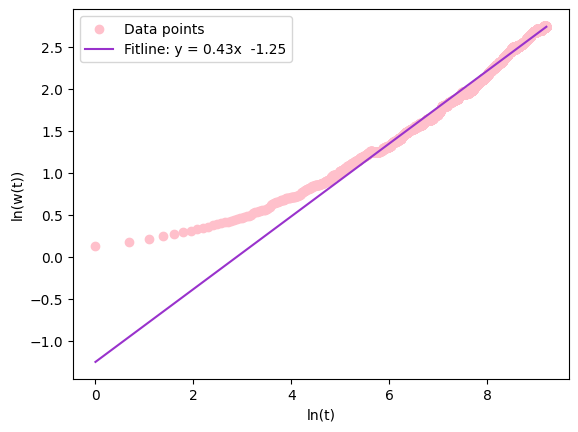

Root Mean Square Error(accuracy)= 0.0570


In [36]:
# the w based on t curve is logarithmic so to make a line fit to it we need to draw a logarithmic 
import numpy as np
import matplotlib.pyplot as plt

z=1 #time interval

#producing the x values= steps
xlist=[]
m=0
for i in range(0,step,z):
    xlist.append(i)


# making the x and y logarithmic
logxlist=[]
for j in xlist:
    logxlist.append(math.log(j+1))


w=[]
m=0
while (z*m)< len(wlist):
    w.append(wlist[z*m])
    m+=1

logwlist=[]
for k in w:
    logwlist.append(math.log(k+1))


# Fit a line
slope, intercept = np.polyfit(logxlist, logwlist, 1)

# y values of the fitted line
fitted_logw = slope * np.array(logxlist) + intercept

# Plotting the data points
plt.scatter(logxlist, logwlist, color='pink', label='Data points')

# Plot the best line that we can fit to the datas
plt.plot(logxlist, fitted_logw, color='darkorchid', label=f'Fitline: y = {slope:.2f}x  {intercept:.2f}')


plt.xlabel("ln(t)")
plt.ylabel("ln(w(t))")    #Surface Roughness =w(t)
plt.legend()
plt.show()


errors = logwlist - fitted_logw  # Difference between actual and predicted values
rmse = np.sqrt(np.mean(errors ** 2))  # Root Mean Square Error
print(f"Root Mean Square Error(accuracy)= {rmse:.4f}")

### Dynamic Growth Profile (β)

In [3]:
# based on the plot we can tell that: beta = 1 with the accuracy of 0.0236
print("β=1")

β=1


## Question 3.2 (Ballistic Deposition with a starting line & Periodic boundary condition) (پایین نشست)

### plotting and finding the Average height & Surface roughness

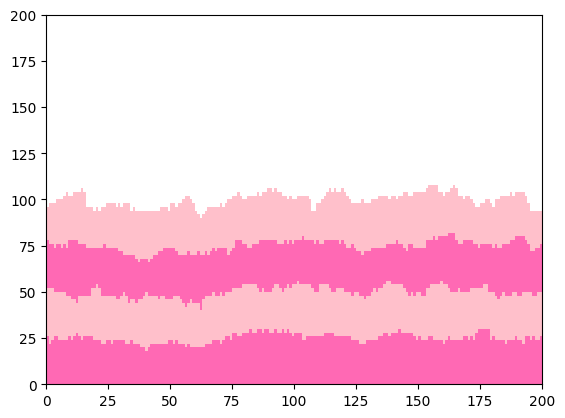

,Average Height,Surface Roughness
0,0.01,0.141067
1,0.02,0.198997
2,0.03,0.243105
3,0.04,0.280000
4,0.05,0.312250
...,...,...
9995,99.96,3.841666
9996,99.97,3.844360
9997,99.98,3.836613
9998,99.99,3.818364


In [2]:
#1 dimentional Random Ballistic Deposition with Relaxation & Periodic boundary condition :

# h_bar = متوسط ارتفاع لایه / w_t = ناهمواری سطح

import random
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches # a library needed for making a shape(square)


fig, ax=plt.subplots() #we use this so we can change the axis as we want
ax.set_xlim(0,200) #setting the axis 
ax.set_ylim(0,200)

step= 10000 #the number of the squares(or particles) that we are modeling
coordinates=[]
length=2 #length of the particle
width=1
y= 0

h =0 #height in every step
h2 = 0
hlist=[]
wlist=[]


for i in range (step): 
    x= np.random.randint(0,200)  #choosing the coordinate of the x randomly
    xl=(x-1)%200
    xr=(x+1)%200
    if (i // 2500 ) % 2 == 0: #changing the color every 2500 times that particles have the same x (the %2 helps us to change the color lternativaly)
        if [x,0] in coordinates: 
            if [xl,0] in coordinates:
                if [xr,0] in coordinates:
                    b=-1 #for the middle point : so if the chosen x has been plotted before try to reaching the y from the end(this help us to get to the biggest y)
                    while coordinates[b][0]!=x:
                        b=b-1  #if the last chosen [x,y] didn't have the x chosen then go back one more
                    l=-1 #same thing for the left neighbor
                    while coordinates[l][0]!=xl:
                        l=l-1  
                    r=-1 #same thing for the right neighbor
                    while coordinates[r][0]!=xr:
                        r=r-1  
                    y =coordinates[b][1] #middle point
                    yr= coordinates[r][1]
                    yl= coordinates[l][1]
                    x=coordinates[b][0]
                    xl=(x-1)%200
                    xr=(x+1)%200
                    xdict = {x: y, xr: yr, xl: yl} # Store variable names with their values in a dictionary so we can choose later between them
                    min_value = min(xdict.values()) # Find the minimum value
                    candidates = [] 
                    if y==min_value : #if the x is the minum, no matter what is the neighboring value, it should always choose the x itself
                        particle= patches.Rectangle([x, y+length],width,length,facecolor='hotpink',linewidth=2) 
                        ax.add_patch(particle)
                        h+=length   #this part is for finding the average height and surface roughness
                        h2+=((y+length)+length)**2
                        h2-=((y+length))**2
                        H2 = h2/200
                        H=h/200
                        hlist.append(H)
                        wlist.append(math.sqrt(abs(H**2-H2)))
                        coordinates.append([x,y+length])
                    else:
                        for name, value in xdict.items():  
                            if value == min_value:  
                                candidates.append(name)  
                        chosen_variable = random.choice(candidates)
                        particle= patches.Rectangle([chosen_variable, xdict[chosen_variable]+length],width,length,facecolor='hotpink',linewidth=2) 
                        ax.add_patch(particle) 
                        h+=length   #this part is for finding the average height and surface roughness
                        h2+=((xdict[chosen_variable]+length)+length)**2
                        h2-=((xdict[chosen_variable]+length))**2
                        H2 = h2/200
                        H=h/200
                        hlist.append(H)
                        wlist.append(math.sqrt(abs(H**2-H2)))
                        coordinates.append([chosen_variable,xdict[chosen_variable]+length])
                else:
                    particle= patches.Rectangle([xr,0],width,length,facecolor='hotpink',linewidth=2) #setting the shape of the rectangle (each particle is considered as a square)
                    ax.add_patch(particle) #patching(the squares or other shapes like that can't be plotted they should be added) the shape
                    h+=length
                    h2+=(length)**2
                    H2 = h2/200
                    H=h/200
                    hlist.append(H)
                    wlist.append(math.sqrt(abs(H**2-H2)))
                    coordinates.append([xr,0])
            else:
                particle= patches.Rectangle([xl,0],width,length,facecolor='hotpink',linewidth=2) #setting the shape of the rectangle (each particle is considered as a square)
                ax.add_patch(particle) #patching(the squares or other shapes like that can't be plotted they should be added) the shape
                h+=length
                h2+=(length)**2
                H2 = h2/200
                H=h/200
                hlist.append(H)
                wlist.append(math.sqrt(abs(H**2-H2)))
                coordinates.append([xl,0])
        else: #so if that x wasn't plottted then plot it for the first time so y=0
            particle= patches.Rectangle([x,0],width,length,facecolor='hotpink',linewidth=2)  
            ax.add_patch(particle) 
            h+=length
            h2+=(length)**2
            H2 = (h2)/200
            H=h/200
            hlist.append(H)
            wlist.append(math.sqrt(abs(H**2-H2)))
            coordinates.append([x,0])
    else: #so if the length of that x is more that 2500 then repeat the whole process but with the other color  
        if [x,0] in coordinates: 
            if [xl,0] in coordinates:
                if [xr,0] in coordinates:
                    b=-1 #for the middle point : so if the chosen x has been plotted before try to reaching the y from the end(this help us to get to the biggest y)
                    while coordinates[b][0]!=x:
                        b=b-1  #if the last chosen [x,y] didn't have the x chosen then go back one more
                    l=-1 #same thing for the left neighbor
                    while coordinates[l][0]!=xl:
                        l=l-1  
                    r=-1 #same thing for the right neighbor
                    while coordinates[r][0]!=xr:
                        r=r-1  
                    y =coordinates[b][1] #middle point
                    yr= coordinates[r][1]
                    yl= coordinates[l][1]
                    x=coordinates[b][0]
                    xl=(x-1)%200
                    xr=(x+1)%200
                    xdict = {x: y, xr: yr, xl: yl} # Store variable names with their values in a dictionary so we can choose later between them
                    min_value = min(xdict.values()) # Find the minimum value
                    candidates = [] 
                    if y==min_value : #if the x is the minum, no matter what is the neighboring value, it should always choose the x itself
                        particle= patches.Rectangle([x, y+length],width,length,facecolor='pink',linewidth=2) 
                        ax.add_patch(particle)
                        h+=length   #this part is for finding the average height and surface roughness
                        h2+=((y+length)+length)**2
                        h2-=((y+length))**2
                        H2 = h2/200
                        H=h/200
                        hlist.append(H)
                        wlist.append(math.sqrt(abs(H**2-H2)))
                        coordinates.append([x,y+length])
                    else:
                        for name, value in xdict.items():  
                            if value == min_value:  
                                candidates.append(name)  
                        chosen_variable = random.choice(candidates)
                        particle= patches.Rectangle([chosen_variable, xdict[chosen_variable]+length],width,length,facecolor='pink',linewidth=2) 
                        ax.add_patch(particle) 
                        h+=length   #this part is for finding the average height and surface roughness
                        h2+=((xdict[chosen_variable]+length)+length)**2
                        h2-=((xdict[chosen_variable]+length))**2
                        H2 = h2/200
                        H=h/200
                        hlist.append(H)
                        wlist.append(math.sqrt(abs(H**2-H2)))
                        coordinates.append([chosen_variable,xdict[chosen_variable]+length])
                else:
                    particle= patches.Rectangle([xr,0],width,length,facecolor='pink',linewidth=2) #setting the shape of the rectangle (each particle is considered as a square)
                    ax.add_patch(particle) #patching(the squares or other shapes like that can't be plotted they should be added) the shape
                    h+=length
                    h2+=(length)**2
                    H2 = h2/200
                    H=h/200
                    hlist.append(H)
                    wlist.append(math.sqrt(abs(H**2-H2)))
                    coordinates.append([xr,0])
            else:
                particle= patches.Rectangle([xl,0],width,length,facecolor='pink',linewidth=2) #setting the shape of the rectangle (each particle is considered as a square)
                ax.add_patch(particle) #patching(the squares or other shapes like that can't be plotted they should be added) the shape
                h+=length
                h2+=(length)**2
                H2 = h2/200
                H=h/200
                hlist.append(H)
                wlist.append(math.sqrt(abs(H**2-H2)))
                coordinates.append([xl,0])
        else: #so if that x wasn't plottted then plot it for the first time so y=0
            particle= patches.Rectangle([x,0],width,length,facecolor='pink',linewidth=2)  
            ax.add_patch(particle) 
            h+=length
            h2+=(length)**2
            H2 = (h2)/200
            H=h/200
            hlist.append(H)
            wlist.append(math.sqrt(abs(H**2-H2)))
            coordinates.append([x,0])
plt.show()
pd.DataFrame({"Average Height":hlist,"Surface Roughness":wlist,})




### Curve of Surface roughness variations over Time

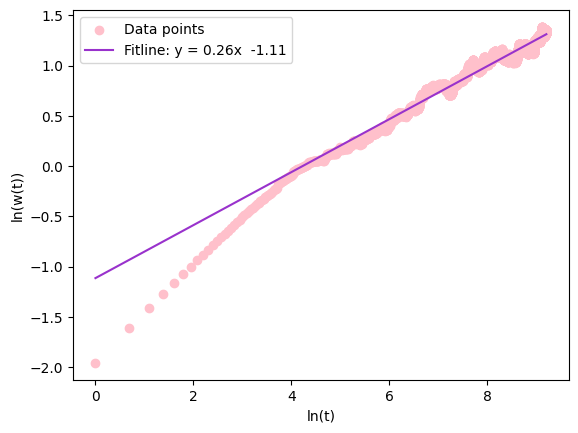

Root Mean Square Error(accuracy)= 0.0560
number of the points needed to see the critical point 9217.0


In [5]:
# the w based on t curve is logarithmic so to make a line fit to it we need to draw a logarithmic 
import numpy as np
import matplotlib.pyplot as plt
import math 
#producing the x values= steps
xlist=[]
for i in range(1,step+1):
    xlist.append(i)

# making the x and y logarithmic
logxlist=[]
for j in xlist:
    logxlist.append(math.log(j))

logwlist=[]
for k in wlist:
    logwlist.append(math.log(k))


# Fit a line
slope, intercept = np.polyfit(logxlist, logwlist, 1)

# y values of the fitted line
fitted_logw = slope * np.array(logxlist) + intercept

# Plotting the data points
plt.scatter(logxlist, logwlist, color='pink', label='Data points')

# Plot the best line that we can fit to the datas
plt.plot(logxlist, fitted_logw, color='darkorchid', label=f'Fitline: y = {slope:.2f}x  {intercept:.2f}')


plt.xlabel("ln(t)")
plt.ylabel("ln(w(t))")    #Surface Roughness =w(t)
plt.legend()
plt.show()


errors = logwlist - fitted_logw  # Difference between actual and predicted values
rmse = np.sqrt(np.mean(errors ** 2))  # Root Mean Square Error
print(f"Root Mean Square Error(accuracy)= {rmse:.4f}")

w_s = pow(math.e,max(logwlist))
t_s = pow(math.e, logxlist[logwlist.index(max(logwlist))])
print("number of the points needed to see the critical point",t_s)

### Different Dynamic Growth Profile (β), (α), (Z)

In [8]:

#(1): t_s = L^z -> z= log(t_s,L)
w_s = pow(math.e,max(logwlist))
t_s = pow(math.e, logxlist[logwlist.index(max(logwlist))])
L= 200
z = math.log(t_s,L)

#(2): t_s^β = w_s -> β= log(w_s,t_s)
beta = math.log(w_s,t_s)


#(3) α = z β
#(1)(2)(3) -> α = log(t_s,L) * log(w_s,t_s)

alpha = math.log(t_s,L) * math.log(w_s,t_s)

print("α=",alpha)
print("β=",beta)
print('z=',z)


α= 0.26135918262051017
β= 0.15169169609628494
z= 1.7229630187180105


## Question 3.3 (Correlated Growth (Ballistic) Side Deposition with a starting line ) (کنار نشست با یک خط شروع کننده)

### plotting and finding the Average height & Surface roughness

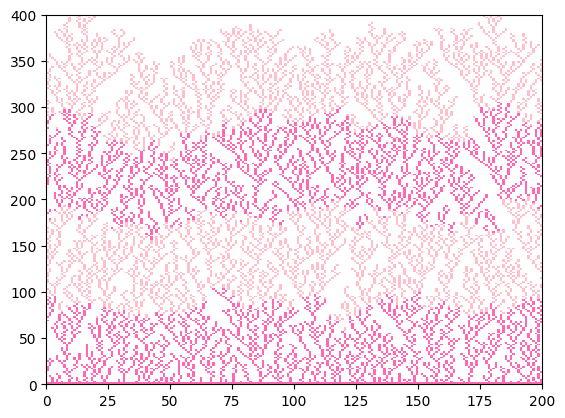

,Average Height,Surface Roughness
0,0.01,0.141067
1,0.02,0.198997
2,0.03,0.243105
3,0.04,0.280000
4,0.05,0.312250
...,...,...
9995,99.96,163.539593
9996,99.97,163.556899
9997,99.98,163.574324
9998,99.99,163.590892


In [7]:
#1 dimentional Random Ballistic Deposition with Relaxation & Periodic boundary condition and the initial condition of a line:

# h_bar = متوسط ارتفاع لایه / w_t = ناهمواری سطح

import random
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches # a library needed for making a shape(square)


fig, ax=plt.subplots() #we use this so we can change the axis as we want
ax.set_xlim(0,200) #setting the axis 
ax.set_ylim(0,400)

step= 10000 #the number of the squares(or particles) that we are modeling
coordinates=[]
length=2 #length of the particle
width=1
y= 0

h =0 #height in every step
h2 = 0 #h^2
hlist=[]
wlist=[]


for i in range (step): 
    x= np.random.randint(0,200)  #choosing the coordinate of the x randomly
    xl=(x-1)%200
    xr=(x+1)%200
    if (i // 2500 ) % 2 == 0: #changing the color every 2500 times that particles have the same x (the %2 helps us to change the color lternativaly)
        if [x,0] in coordinates: 
            if [xl,0] in coordinates:
                if [xr,0] in coordinates:
                    b=-1 #for the middle point : so if the chosen x has been plotted before try to reaching the y from the end(this help us to get to the biggest y)
                    while coordinates[b][0]!=x:
                        b=b-1  #if the last chosen [x,y] didn't have the x chosen then go back one more
                    l=-1 #same thing for the left neighbor
                    while coordinates[l][0]!=xl:
                        l=l-1  
                    r=-1 #same thing for the right neighbor
                    while coordinates[r][0]!=xr:
                        r=r-1  
                    y =coordinates[b][1] #middle point
                    yr= coordinates[r][1]
                    yl= coordinates[l][1]
                    x=coordinates[b][0]
                    xl=(x-1)%200
                    xr=(x+1)%200
                    max_value = max(y,yr,yl) # Find the maximum y
                    particle= patches.Rectangle([x, max_value+length],width,length,facecolor='hotpink',linewidth=2) 
                    ax.add_patch(particle) 
                    h+=length   #this part is for finding the average height and surface roughness
                    h2+=((max_value+length)+length)**2
                    h2-=((max_value+length))**2
                    H2 = h2/200
                    H=h/200
                    hlist.append(H)
                    wlist.append(math.sqrt(abs(H**2-H2)))
                    coordinates.append([x,max_value+length])
                else:
                    b=-1 #for the middle point : so if the chosen x has been plotted before try to reaching the y from the end(this help us to get to the biggest y)
                    while coordinates[b][0]!=x:
                        b=b-1  #if the last chosen [x,y] didn't have the x chosen then go back one more
                    l=-1 #same thing for the left neighbor
                    while coordinates[l][0]!=xl:
                        l=l-1   
                    y =coordinates[b][1] #middle point
                    yl= coordinates[l][1]
                    max_value = max(y,yl) # Find the maximum y
                    particle= patches.Rectangle([x, max_value+length],width,length,facecolor='hotpink',linewidth=2) 
                    ax.add_patch(particle) 
                    h+=length   #this part is for finding the average height and surface roughness
                    h2+=((max_value+length)+length)**2
                    h2-=((max_value+length))**2
                    H2 = h2/200
                    H=h/200
                    hlist.append(H)
                    wlist.append(math.sqrt(abs(H**2-H2)))
                    coordinates.append([x,max_value+length])
            else:
                particle= patches.Rectangle([x,0],width,length,facecolor='hotpink',linewidth=2) #setting the shape of the rectangle (each particle is considered as a square)
                ax.add_patch(particle) #patching(the squares or other shapes like that can't be plotted they should be added) the shape
                h+=length
                h2+=(length)**2
                H2 = h2/200
                H=h/200
                hlist.append(H)
                wlist.append(math.sqrt(abs(H**2-H2)))
                coordinates.append([x,0])
        else: #so if that x wasn't plottted then plot it for the first time so y=0
            particle= patches.Rectangle([x,0],width,length,facecolor='hotpink',linewidth=2)  
            ax.add_patch(particle) 
            h+=length
            h2+=(length)**2
            H2 = (h2)/200
            H=h/200
            hlist.append(H)
            wlist.append(math.sqrt(abs(H**2-H2)))
            coordinates.append([x,0])
    else: #so if the length of that x is more that 2500 then repeat the whole process but with the other color  
        if [x,0] in coordinates: 
            if [xl,0] in coordinates:
                if [xr,0] in coordinates:
                    b=-1 #for the middle point : so if the chosen x has been plotted before try to reaching the y from the end(this help us to get to the biggest y)
                    while coordinates[b][0]!=x:
                        b=b-1  #if the last chosen [x,y] didn't have the x chosen then go back one more
                    l=-1 #same thing for the left neighbor
                    while coordinates[l][0]!=xl:
                        l=l-1  
                    r=-1 #same thing for the right neighbor
                    while coordinates[r][0]!=xr:
                        r=r-1  
                    y =coordinates[b][1] #middle point
                    yr= coordinates[r][1]
                    yl= coordinates[l][1]
                    x=coordinates[b][0]
                    xl=(x-1)%200
                    xr=(x+1)%200
                    max_value = max(y,yr,yl) # Find the maximum y
                    particle= patches.Rectangle([x, max_value+length],width,length,facecolor='pink',linewidth=2) 
                    ax.add_patch(particle) 
                    h+=length   #this part is for finding the average height and surface roughness
                    h2+=((max_value+length)+length)**2
                    h2-=((max_value+length))**2
                    H2 = h2/200
                    H=h/200
                    hlist.append(H)
                    wlist.append(math.sqrt(abs(H**2-H2)))
                    coordinates.append([x,max_value+length])
                else:
                    particle= patches.Rectangle([x,0],width,length,facecolor='pink',linewidth=2) #setting the shape of the rectangle (each particle is considered as a square)
                    ax.add_patch(particle) #patching(the squares or other shapes like that can't be plotted they should be added) the shape
                    h+=length
                    h2+=(length)**2
                    H2 = h2/200
                    H=h/200
                    hlist.append(H)
                    wlist.append(math.sqrt(abs(H**2-H2)))
                    coordinates.append([x,0])
            else:
                particle= patches.Rectangle([x,0],width,length,facecolor='pink',linewidth=2) #setting the shape of the rectangle (each particle is considered as a square)
                ax.add_patch(particle) #patching(the squares or other shapes like that can't be plotted they should be added) the shape
                h+=length
                h2+=(length)**2
                H2 = h2/200
                H=h/200
                hlist.append(H)
                wlist.append(math.sqrt(abs(H**2-H2)))
                coordinates.append([x,0])
        else: #so if that x wasn't plottted then plot it for the first time so y=0
            particle= patches.Rectangle([x,0],width,length,facecolor='pink',linewidth=2)  
            ax.add_patch(particle) 
            h+=length
            h2+=(length)**2
            H2 = (h2)/200
            H=h/200
            hlist.append(H)
            wlist.append(math.sqrt(abs(H**2-H2)))
            coordinates.append([x,0])
plt.show()
pd.DataFrame({"Average Height":hlist,"Surface Roughness":wlist,})




### Curve of Surface roughness variations over Time

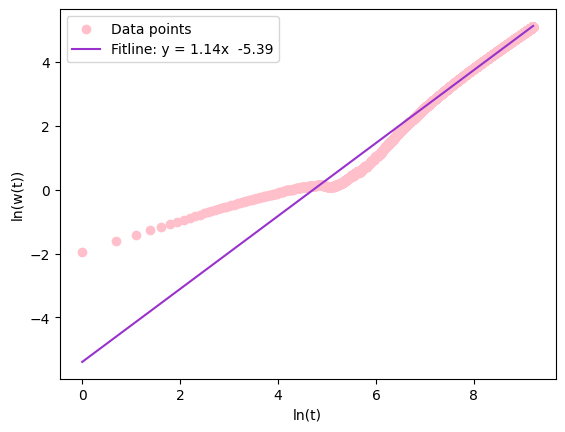

Root Mean Square Error(accuracy)= 0.1529


In [8]:
# the w based on t curve is logarithmic so to make a line fit to it we need to draw a logarithmic 
import numpy as np
import matplotlib.pyplot as plt
import math 
#producing the x values= steps
xlist=[]
for i in range(1,step+1):
    xlist.append(i)

# making the x and y logarithmic
logxlist=[]
for j in xlist:
    logxlist.append(math.log(j))

logwlist=[]
for k in wlist:
    logwlist.append(math.log(k))


# Fit a line
slope, intercept = np.polyfit(logxlist, logwlist, 1)

# y values of the fitted line
fitted_logw = slope * np.array(logxlist) + intercept

# Plotting the data points
plt.scatter(logxlist, logwlist, color='pink', label='Data points')

# Plot the best line that we can fit to the datas
plt.plot(logxlist, fitted_logw, color='darkorchid', label=f'Fitline: y = {slope:.2f}x  {intercept:.2f}')


plt.xlabel("ln(t)")
plt.ylabel("ln(w(t))")    #Surface Roughness =w(t)
plt.legend()
plt.show()


errors = logwlist - fitted_logw  # Difference between actual and predicted values
rmse = np.sqrt(np.mean(errors ** 2))  # Root Mean Square Error
print(f"Root Mean Square Error(accuracy)= {rmse:.4f}")

w_s = pow(math.e,max(logwlist))
t_s = pow(math.e, logxlist[logwlist.index(max(logwlist))])

### Different Dynamic Growth Profile (β), (α), (Z)

In [9]:

#(1): t_s = L^z -> z= log(t_s,L)
w_s = pow(math.e,max(logwlist))
t_s = pow(math.e, logxlist[logwlist.index(max(logwlist))])
L= 200
z = math.log(t_s,L)

#(2): t_s^β = w_s -> β= log(w_s,t_s)
beta = math.log(w_s,t_s)


#(3) α = z β
#(1)(2)(3) -> α = log(t_s,L) * log(w_s,t_s)

alpha = math.log(t_s,L) * math.log(w_s,t_s)

print("α=",alpha)
print("β=",beta)
print('z=',z)


α= 0.26135918262051017
β= 0.15169169609628494
z= 1.7229630187180105


## Question 3.4 (Ballistic side Deposition with a starting point) ( کنار نشست با یک نقطه شروع کننده)

### Plotting and finding the Average height & Surface roughness

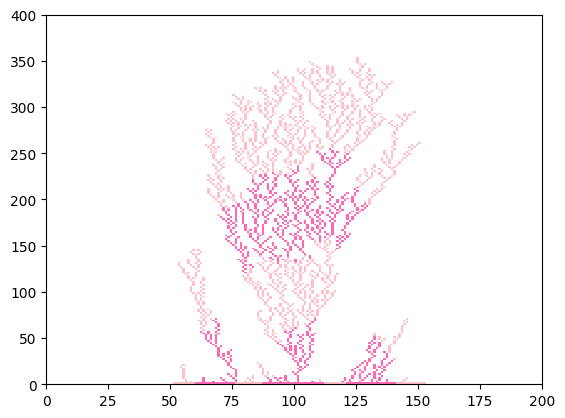

,Average Height,Surface Roughness
0,0.01,0.141067
1,0.02,0.198997
2,0.03,0.243105
3,0.04,0.344093
4,0.05,0.466369
...,...,...
2512,25.13,90.115388
2513,25.14,90.151763
2514,25.15,90.163504
2515,25.16,90.197641


In [20]:
#1 dimentional Random Ballistic Deposition with Relaxation & Periodic boundary condition and the initial condition of a point:

# h_bar = متوسط ارتفاع لایه / w_t = ناهمواری سطح

import random
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches # a library needed for making a shape(square)


fig, ax=plt.subplots() #we use this so we can change the axis as we want
ax.set_xlim(0,200) #setting the axis 
ax.set_ylim(0,400)

step= 10000 #the number of the squares(or particles) that we are modeling
coordinates=[]
length=2 #length of the particle
width=1
y= 0

h =0 #height in every step
h2 = 0 #h^2
hlist=[]
wlist=[]

random_list=[100]
distance=[]
for i in range (step): 
    distance.append((max(random_list)-min(random_list))/200)
    for d in coordinates:
        if d[0] not in random_list:
            random_list.append(d[0])
        if d[0]+1 not in random_list:
            random_list.append(d[0]+1)
        if d[0]-1 not in random_list:
            random_list.append(d[0]-1)
    x= np.random.randint(0,200)
    if x in random_list:
        xl=(x-1)%200
        xr=(x+1)%200
        if (i // 2500 ) % 2 == 0: #changing the color every 2500 times that particles have the same x (the %2 helps us to change the color lternativaly)
            if [x,0] in coordinates: 
                if [xl,0] in coordinates:
                    if [xr,0] in coordinates:
                        b=-1 #for the middle point : so if the chosen x has been plotted before try to reaching the y from the end(this help us to get to the biggest y)
                        while coordinates[b][0]!=x:
                            b=b-1  #if the last chosen [x,y] didn't have the x chosen then go back one more
                        l=-1 #same thing for the left neighbor
                        while coordinates[l][0]!=xl:
                            l=l-1  
                        r=-1 #same thing for the right neighbor
                        while coordinates[r][0]!=xr:
                            r=r-1  
                        y =coordinates[b][1] #middle point
                        yr= coordinates[r][1]
                        yl= coordinates[l][1]
                        x=coordinates[b][0]
                        xl=(x-1)%200
                        xr=(x+1)%200
                        max_value = max(y,yr,yl) # Find the maximum y
                        particle= patches.Rectangle([x, max_value+length],width,length,facecolor='hotpink',linewidth=2) 
                        ax.add_patch(particle) 
                        h+=length   #this part is for finding the average height and surface roughness
                        h2+=((max_value+length)+length)**2
                        h2-=((max_value+length))**2
                        H2 = h2/200
                        H=h/200
                        hlist.append(H)
                        wlist.append(math.sqrt(abs(H**2-H2)))
                        coordinates.append([x,max_value+length])
                    else:
                        b=-1 #for the middle point : so if the chosen x has been plotted before try to reaching the y from the end(this help us to get to the biggest y)
                        while coordinates[b][0]!=x:
                            b=b-1  #if the last chosen [x,y] didn't have the x chosen then go back one more
                        l=-1 #same thing for the left neighbor
                        while coordinates[l][0]!=xl:
                            l=l-1   
                        y =coordinates[b][1] #middle point
                        yl= coordinates[l][1]
                        max_value = max(y,yl) # Find the maximum y
                        particle= patches.Rectangle([x, max_value+length],width,length,facecolor='hotpink',linewidth=2) 
                        ax.add_patch(particle) 
                        h+=length   #this part is for finding the average height and surface roughness
                        h2+=((max_value+length)+length)**2
                        h2-=((max_value+length))**2
                        H2 = h2/200
                        H=h/200
                        hlist.append(H)
                        wlist.append(math.sqrt(abs(H**2-H2)))
                        coordinates.append([x,max_value+length])
                else:
                    particle= patches.Rectangle([x,0],width,length,facecolor='hotpink',linewidth=2) #setting the shape of the rectangle (each particle is considered as a square)
                    ax.add_patch(particle) #patching(the squares or other shapes like that can't be plotted they should be added) the shape
                    h+=length
                    h2+=(length)**2
                    H2 = h2/200
                    H=h/200
                    hlist.append(H)
                    wlist.append(math.sqrt(abs(H**2-H2)))
                    coordinates.append([x,0])
            else: #so if that x wasn't plottted then plot it for the first time so y=0
                particle= patches.Rectangle([x,0],width,length,facecolor='hotpink',linewidth=2)  
                ax.add_patch(particle) 
                h+=length
                h2+=(length)**2
                H2 = (h2)/200
                H=h/200
                hlist.append(H)
                wlist.append(math.sqrt(abs(H**2-H2)))
                coordinates.append([x,0])
        else: #so if the length of that x is more that 2500 then repeat the whole process but with the other color  
            if [x,0] in coordinates: 
                if [xl,0] in coordinates:
                    if [xr,0] in coordinates:
                        b=-1 #for the middle point : so if the chosen x has been plotted before try to reaching the y from the end(this help us to get to the biggest y)
                        while coordinates[b][0]!=x:
                            b=b-1  #if the last chosen [x,y] didn't have the x chosen then go back one more
                        l=-1 #same thing for the left neighbor
                        while coordinates[l][0]!=xl:
                            l=l-1  
                        r=-1 #same thing for the right neighbor
                        while coordinates[r][0]!=xr:
                            r=r-1  
                        y =coordinates[b][1] #middle point
                        yr= coordinates[r][1]
                        yl= coordinates[l][1]
                        x=coordinates[b][0]
                        xl=(x-1)%200
                        xr=(x+1)%200
                        max_value = max(y,yr,yl) # Find the maximum y
                        particle= patches.Rectangle([x, max_value+length],width,length,facecolor='pink',linewidth=2) 
                        ax.add_patch(particle) 
                        h+=length   #this part is for finding the average height and surface roughness
                        h2+=((max_value+length)+length)**2
                        h2-=((max_value+length))**2
                        H2 = h2/200
                        H=h/200
                        hlist.append(H)
                        wlist.append(math.sqrt(abs(H**2-H2)))
                        coordinates.append([x,max_value+length])
                    else:
                        particle= patches.Rectangle([x,0],width,length,facecolor='pink',linewidth=2) #setting the shape of the rectangle (each particle is considered as a square)
                        ax.add_patch(particle) #patching(the squares or other shapes like that can't be plotted they should be added) the shape
                        h+=length
                        h2+=(length)**2
                        H2 = h2/200
                        H=h/200
                        hlist.append(H)
                        wlist.append(math.sqrt(abs(H**2-H2)))
                        coordinates.append([x,0])
                else:
                    particle= patches.Rectangle([x,0],width,length,facecolor='pink',linewidth=2) #setting the shape of the rectangle (each particle is considered as a square)
                    ax.add_patch(particle) #patching(the squares or other shapes like that can't be plotted they should be added) the shape
                    h+=length
                    h2+=(length)**2
                    H2 = h2/200
                    H=h/200
                    hlist.append(H)
                    wlist.append(math.sqrt(abs(H**2-H2)))
                    coordinates.append([x,0])
            else: #so if that x wasn't plottted then plot it for the first time so y=0
                particle= patches.Rectangle([x,0],width,length,facecolor='pink',linewidth=2)  
                ax.add_patch(particle) 
                h+=length
                h2+=(length)**2
                H2 = (h2)/200
                H=h/200
                hlist.append(H)
                wlist.append(math.sqrt(abs(H**2-H2)))
                coordinates.append([x,0])
    else:
        continue


plt.show()
pd.DataFrame({"Average Height":hlist,"Surface Roughness":wlist})

print(len(wlist))

### Curve of Lateral width variations over Time

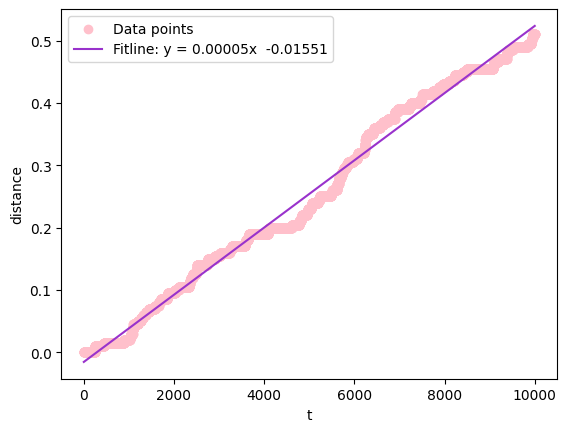

Root Mean Square Error(accuracy)= 0.015448905288198523


In [31]:
# the w based on t curve is logarithmic so to make a line fit to it we need to draw a logarithmic 
import numpy as np
import matplotlib.pyplot as plt
import math 
#producing the x values= steps
xlist=[]
for i in range(1,step+1):
    xlist.append(i)

# Fit a line
slope, intercept = np.polyfit(xlist, distance, 1)

# y values of the fitted line
fitted_distance = slope * np.array(xlist) + intercept

# Plotting the data points
plt.scatter(xlist, distance, color='pink', label='Data points')

# Plot the best line that we can fit to the datas
plt.plot(xlist, fitted_distance, color='darkorchid', label=f'Fitline: y = {slope:.5f}x  {intercept:.5f}')


plt.xlabel("t")
plt.ylabel("distance")    #Surface Roughness =w(t)
plt.legend()
plt.show()


errors = distance - fitted_distance  # Difference between actual and predicted values
rmse = np.sqrt(np.mean(errors ** 2))  # Root Mean Square Error
print("Root Mean Square Error(accuracy)=" ,rmse)


#### Finding the β

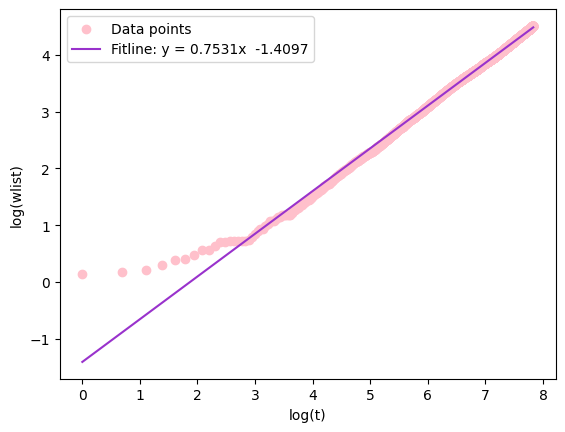

Root Mean Square Error(accuracy)= 0.05415417652168559
β= 0.7530639990450566


In [32]:
# the w based on t curve is logarithmic so to make a line fit to it we need to draw a logarithmic 
import numpy as np
import matplotlib.pyplot as plt
import math 
#producing the x values= steps
xlist=[]
for i in range(len(wlist)):
    xlist.append(i)

# making the x and y logarithmic
logxlist=[]
for j in xlist:
    logxlist.append(math.log(j+1))

logwlist=[]
for k in wlist:
    logwlist.append(math.log(k+1))

# Fit a line
slope, intercept = np.polyfit(logxlist, logwlist, 1)

# y values of the fitted line
fitted_logwlist = slope * np.array(logxlist) + intercept

# Plotting the data points
plt.scatter(logxlist, logwlist, color='pink', label='Data points')

# Plot the best line that we can fit to the datas
plt.plot(logxlist, fitted_logwlist, color='darkorchid', label=f'Fitline: y = {slope:.4f}x  {intercept:.4f}')


plt.xlabel("log(t)")
plt.ylabel("log(wlist)")    #Surface Roughness =w(t)
plt.legend()
plt.show()


errors = logwlist - fitted_logwlist  # Difference between actual and predicted values
rmse = np.sqrt(np.mean(errors ** 2))  # Root Mean Square Error
print("Root Mean Square Error(accuracy)=" ,rmse)
print("β=" ,slope)

## Question 3.5 (Competitive Ballistic Deposition) ( ول نشست رقابتی)

### Plotting

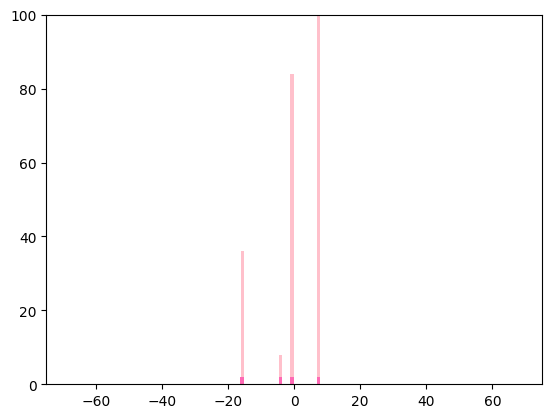

,Average Height,Surface Roughness
0,0.00,0.000000
1,0.00,0.000000
2,0.01,0.141067
3,0.03,0.446206
4,0.03,0.615711
...,...,...
395,556.35,65009.426314
396,559.66,65489.431810
397,562.98,65971.594248
398,566.31,66455.916895


In [55]:
#1 dimentional Random Ballistic Deposition :

# h_bar = متوسط ارتفاع لایه / w_t = ناهمواری سطح

import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches # a library needed for making a shape(square)


fig, ax=plt.subplots() #we use this so we can change the axis as we want
ax.set_xlim(-75,75) #setting the axis 
ax.set_ylim(0,100)

length= 2 #length of the particle
width=1
step=400
coordinates={}

h =0 #height in every step
h2 = 0
hlist=[]
wlist=[]

for i in range (step): 
    c=+1
    b= np.random.randint(-100,100)
    listc= list(coordinates.keys())
    listc.sort()
    listc.reverse()
    xintersection= -b/6
    for i in listc :
        y= 6*i + b
        if coordinates[i] >= y :
            coordinates[i] = coordinates[i] + length
            c=-1
            particle= patches.Rectangle([i,coordinates[i]],width,length,facecolor='pink',linewidth=2) #setting the shape of the rectangle (each particle is considered as a square)
            ax.add_patch(particle) #patching(the squares or other shapes like that can't be plotted they should be added) the shape
            h+=coordinates[i]
            h2+=(h)**2
            H2 = h2/200
            H=h/200
            hlist.append(H)
            wlist.append(math.sqrt(abs(H**2-H2)))
            break
    if c == 1:
        particle= patches.Rectangle([xintersection,0],width,length,facecolor='hotpink',linewidth=2) #setting the shape of the rectangle (each particle is considered as a square)
        ax.add_patch(particle) #patching(the squares or other shapes like that can't be plotted they should be added) the shape 
        coordinates[xintersection] = 0
        h+=0
        h2+=(h)**2
        H2 = h2/200
        H=h/200
        hlist.append(H)
        wlist.append(math.sqrt(abs(H**2-H2)))
        c=1
plt.show()
pd.DataFrame({"Average Height":hlist,"Surface Roughness":wlist,})


### Dynamic Growth Profile (β)

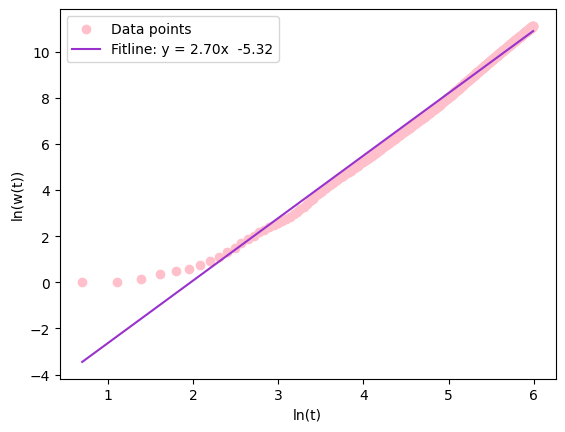

Root Mean Square Error(accuracy)= 0.3034
β= 2.7045654476207615


In [56]:
# the w based on t curve is logarithmic so to make a line fit to it we need to draw a logarithmic 
import numpy as np
import matplotlib.pyplot as plt

#producing the x values= steps
xlist=[]
for i in range(1,step+1):
    xlist.append(i)

# making the x and y logarithmic
logxlist=[]
for j in xlist:
    logxlist.append(math.log(j+1))

logwlist=[]
for k in wlist:
    logwlist.append(math.log(k+1))


# Fit a line
slope, intercept = np.polyfit(logxlist, logwlist, 1)

# y values of the fitted line
fitted_logw = slope * np.array(logxlist) + intercept

# Plotting the data points
plt.scatter(logxlist, logwlist, color='pink', label='Data points')

# Plot the best line that we can fit to the datas
plt.plot(logxlist, fitted_logw, color='darkorchid', label=f'Fitline: y = {slope:.2f}x  {intercept:.2f}')


plt.xlabel("ln(t)")
plt.ylabel("ln(w(t))")    #Surface Roughness =w(t)
plt.legend()
plt.show()


errors = logwlist - fitted_logw  # Difference between actual and predicted values
rmse = np.sqrt(np.mean(errors ** 2))  # Root Mean Square Error
print(f"Root Mean Square Error(accuracy)= {rmse:.4f}")
print("β=",slope)

### histogram of the height in different time periods (steps)

#### time period :40 

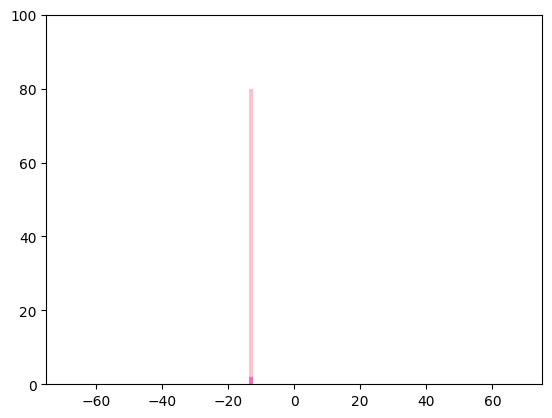

In [14]:
#1 dimentional Random Ballistic Deposition :

# h_bar = متوسط ارتفاع لایه / w_t = ناهمواری سطح

import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches # a library needed for making a shape(square)


fig, ax=plt.subplots() #we use this so we can change the axis as we want
ax.set_xlim(-75,75) #setting the axis 
ax.set_ylim(0,100)

length= 2 #length of the particle
width=1
step=40
coordinates={}


for i in range (step): 
    c=+1
    b= np.random.randint(-100,100)
    listc= list(coordinates.keys())
    listc.sort()
    listc.reverse()
    xintersection= -b/6
    for i in listc :
        y= 6*i + b
        if coordinates[i] >= y :
            coordinates[i] = coordinates[i] + length
            c=-1
            particle= patches.Rectangle([i,coordinates[i]],width,length,facecolor='pink',linewidth=2) #setting the shape of the rectangle (each particle is considered as a square)
            ax.add_patch(particle) #patching(the squares or other shapes like that can't be plotted they should be added) the shape
            break
    if c == 1:
        particle= patches.Rectangle([xintersection,0],width,length,facecolor='hotpink',linewidth=2) #setting the shape of the rectangle (each particle is considered as a square)
        ax.add_patch(particle) #patching(the squares or other shapes like that can't be plotted they should be added) the shape 
        coordinates[xintersection] = 0
        c=1
plt.show()


#### time period : 600

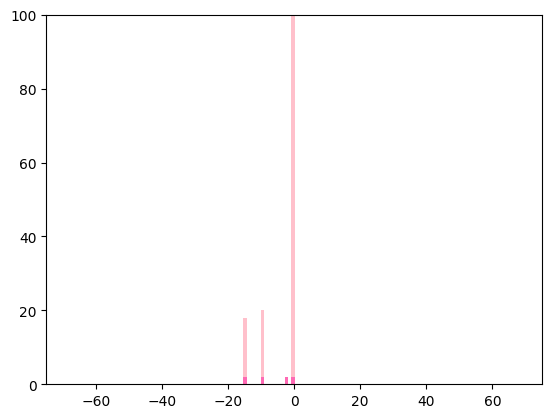

In [15]:
#1 dimentional Random Ballistic Deposition :

# h_bar = متوسط ارتفاع لایه / w_t = ناهمواری سطح

import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches # a library needed for making a shape(square)


fig, ax=plt.subplots() #we use this so we can change the axis as we want
ax.set_xlim(-75,75) #setting the axis 
ax.set_ylim(0,100)

length= 2 #length of the particle
width=1
step=600
coordinates={}


for i in range (step): 
    c=+1
    b= np.random.randint(-100,100)
    listc= list(coordinates.keys())
    listc.sort()
    listc.reverse()
    xintersection= -b/6
    for i in listc :
        y= 6*i + b
        if coordinates[i] >= y :
            coordinates[i] = coordinates[i] + length
            c=-1
            particle= patches.Rectangle([i,coordinates[i]],width,length,facecolor='pink',linewidth=2) #setting the shape of the rectangle (each particle is considered as a square)
            ax.add_patch(particle) #patching(the squares or other shapes like that can't be plotted they should be added) the shape
            break
    if c == 1:
        particle= patches.Rectangle([xintersection,0],width,length,facecolor='hotpink',linewidth=2) #setting the shape of the rectangle (each particle is considered as a square)
        ax.add_patch(particle) #patching(the squares or other shapes like that can't be plotted they should be added) the shape 
        coordinates[xintersection] = 0
        c=1
plt.show()


#### time period : 1000

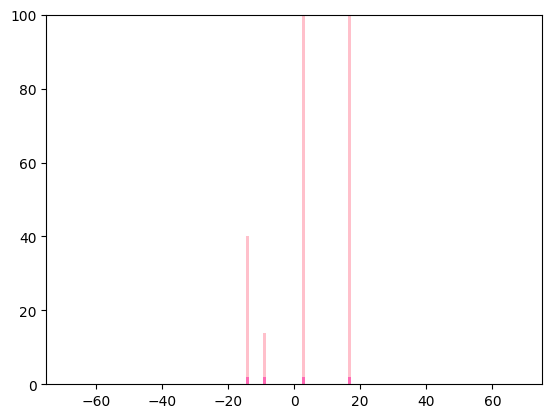

In [28]:
#1 dimentional Random Ballistic Deposition :

# h_bar = متوسط ارتفاع لایه / w_t = ناهمواری سطح

import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches # a library needed for making a shape(square)


fig, ax=plt.subplots() #we use this so we can change the axis as we want
ax.set_xlim(-75,75) #setting the axis 
ax.set_ylim(0,100)

length= 2 #length of the particle
width=1
step=1000
coordinates={}


for i in range (step): 
    c=+1
    b= np.random.randint(-100,100)
    listc= list(coordinates.keys())
    listc.sort()
    listc.reverse()
    xintersection= -b/6
    for i in listc :
        y= 6*i + b
        if coordinates[i] >= y :
            coordinates[i] = coordinates[i] + length
            c=-1
            particle= patches.Rectangle([i,coordinates[i]],width,length,facecolor='pink',linewidth=2) #setting the shape of the rectangle (each particle is considered as a square)
            ax.add_patch(particle) #patching(the squares or other shapes like that can't be plotted they should be added) the shape
            break
    if c == 1:
        particle= patches.Rectangle([xintersection,0],width,length,facecolor='hotpink',linewidth=2) #setting the shape of the rectangle (each particle is considered as a square)
        ax.add_patch(particle) #patching(the squares or other shapes like that can't be plotted they should be added) the shape 
        coordinates[xintersection] = 0
        c=1
plt.show()
